The purpose of this notebook is to do some high level analyses on unpaid labor done by women across the world. This is based on data collected by 'The World Bank', and available [here](https://datahub.io/world-bank/sg.tim.uwrk.fe#readme)

According to the website: <i>"The average time women spend on household provision of services for own consumption. Data are expressed as a proportion of time in a day. Domestic and care work includes food preparation, dishwashing, cleaning and upkeep of a dwelling, laundry, ironing, gardening, caring for pets, shopping, installation, servicing and repair of personal and household goods, childcare, and care of the sick, elderly or disabled household members, among others."</i>

The purpose of this notebook is to look at how unpaid labor shifts over time and across Geographies. Also to see if there's any correlation between GDP and the amount of unpaid labor. 

In [1]:
%matplotlib inline
import pandas as pd
import pycountry_convert as pc
import plotly.express as px

In [50]:
def country_to_continent(country_name):
    country_continent_name = ""
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    except:
        country_continent_name = "Other"
    return country_continent_name

In [51]:
"""
Directly downloading the data from the site into a csv file because there was an issue with the api
"""

data = pd.read_csv('./data/data_csv.csv')
data.head()

,Country Name,Country Code,Year,Value
0,Albania,ALB,2011,21.74
1,Algeria,DZA,2012,22.08
2,Argentina,ARG,2005,16.74
3,Argentina,ARG,2010,23.75
4,Argentina,ARG,2013,23.68


In [52]:
data = data.rename(columns={"Value":"unpaid_labor"})

In [53]:
data['continent'] =  data.apply(lambda x: country_to_continent(x['Country Name']),axis=1)

Upon looking at the data in the csv file, I've noticed that it doesn't contain an exhaustive list of countries across the world. It doesn't have consistent data for all of them over the years. We have the most data from USA, and Switzerland. There are large gaps in data, for example, in the case of Canada, we only have data for 2005 and 2010. 

<h2> Plotting Unpaid Labor Trends for Some Countries in North America

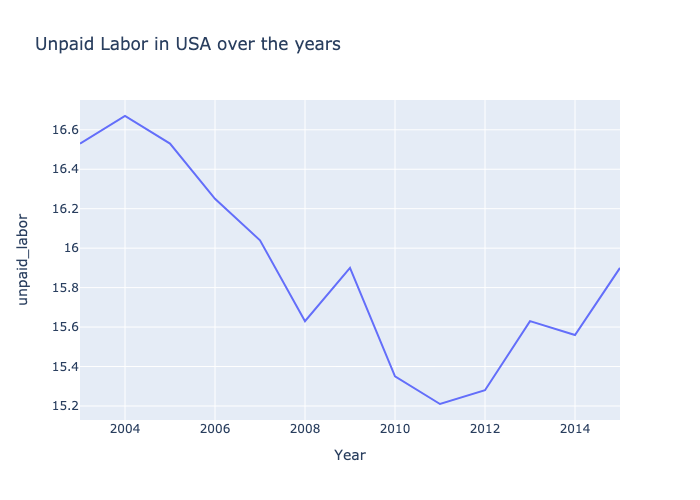

In [54]:
fig = px.line(data[data['Country Code']=='USA'], x="Year", y="unpaid_labor", title='Unpaid Labor in USA over the years')
fig.show("png")

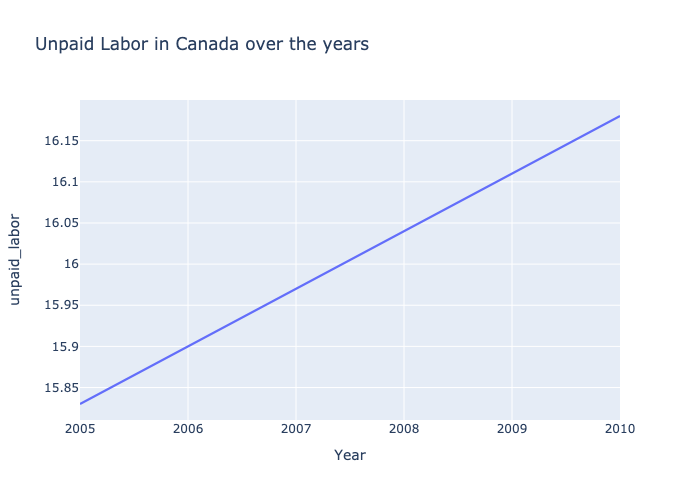

In [8]:
fig = px.line(data[data['Country Code']=='CAN'], x="Year", y="unpaid_labor", title='Unpaid Labor in Canada over the years')
fig.show("png")

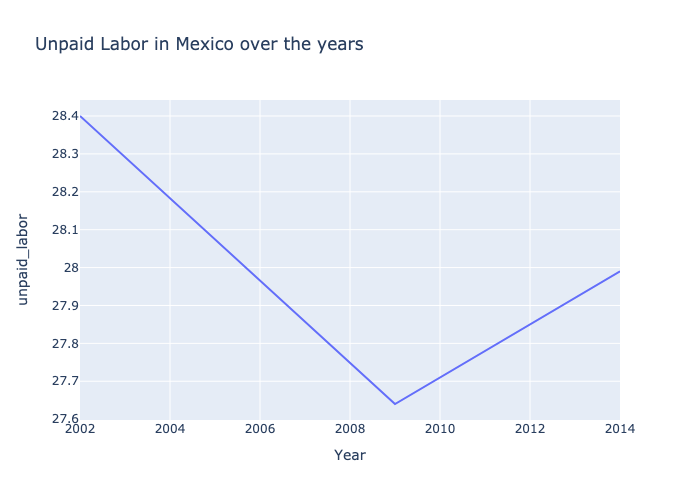

In [7]:
fig = px.line(data[data['Country Code']=='MEX'], x="Year", y="unpaid_labor", title='Unpaid Labor in Mexico over the years')
fig.show("png")

As mentioned earlier, there is an inconsistency in the amount of data that exists across various countries. It probably makes sense to leave out countries that don't have at least 3 data points. We can probably add those countries back once we look at trends in GDP and see if there's a correlation between GDP and unpaid labor. 

It also makes sense to join this data against GDP data (also made available by the World Bank)

In [55]:
gdp_data = pd.read_csv('./data/core/gdp/data/gdp_csv.csv')
gdp_data.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [56]:
gdp_data = gdp_data.rename(columns={"Value":"gdp"})

Joining the two datasets by country code and year to get the dataframe below

In [57]:
#joining unpaid labor data with gdp data for the year 2014
pd_join_1 = pd.merge(data,gdp_data,on=['Country Code','Year','Country Name'])
pd_join_1

,Country Name,Country Code,Year,unpaid_labor,continent,gdp
0,Albania,ALB,2011,21.74,Europe,1.289087e+10
1,Algeria,DZA,2012,22.08,Africa,2.090590e+11
2,Argentina,ARG,2005,16.74,South America,1.987371e+11
3,Argentina,ARG,2010,23.75,South America,4.236274e+11
4,Argentina,ARG,2013,23.68,South America,5.520251e+11
...,...,...,...,...,...,...
143,United States,USA,2015,15.90,North America,1.812071e+13
144,Uruguay,URY,2007,25.21,South America,2.341057e+10
145,Uruguay,URY,2013,20.14,South America,5.753123e+10
146,West Bank and Gaza,PSE,2000,20.21,Other,4.313600e+09


<h2> Plotting Unpaid Labor and GDP in the Year 2014

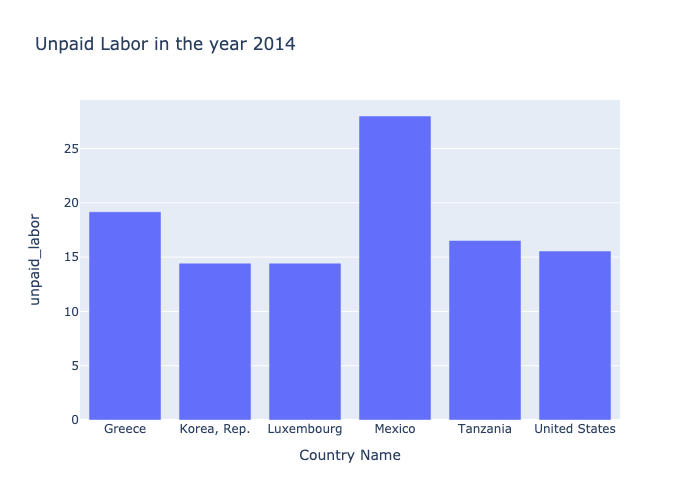

In [11]:
fig = px.bar(pd_join_1[pd_join_1['Year']==2014], x="Country Name", y="unpaid_labor", title='Unpaid Labor in the year 2014')
fig.show("png")

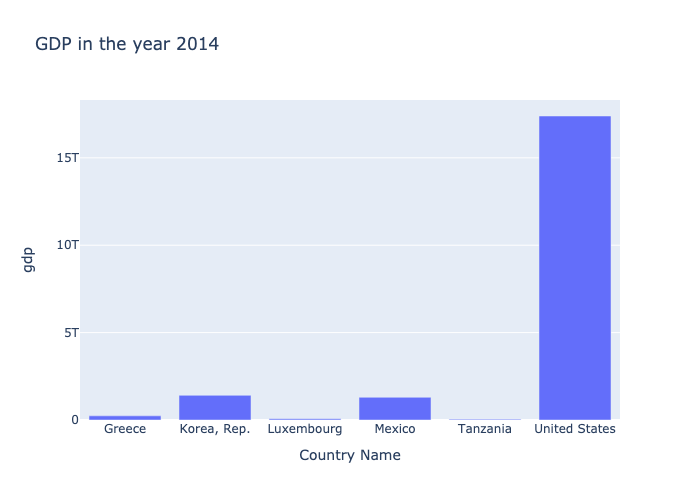

In [12]:
fig = px.bar(pd_join_1[pd_join_1['Year']==2014], x="Country Name", y="gdp", title='GDP in the year 2014')
fig.show("png")

<h2> Is there a definitive impact of GDP on unpaid labor?

/Users/anusreeb/Documents/code/venv/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



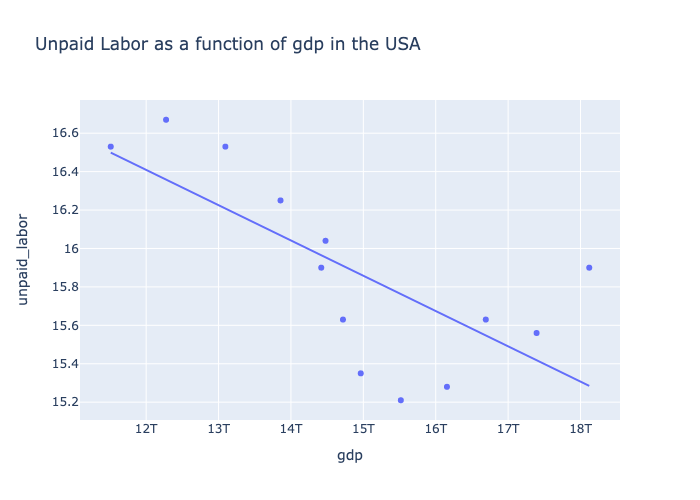

In [13]:
fig = px.scatter(pd_join_1[pd_join_1['Country Code']=='USA'], x="gdp", y="unpaid_labor",
                 title='Unpaid Labor as a function of gdp in the USA',
                trendline='ols')
fig.show("png")

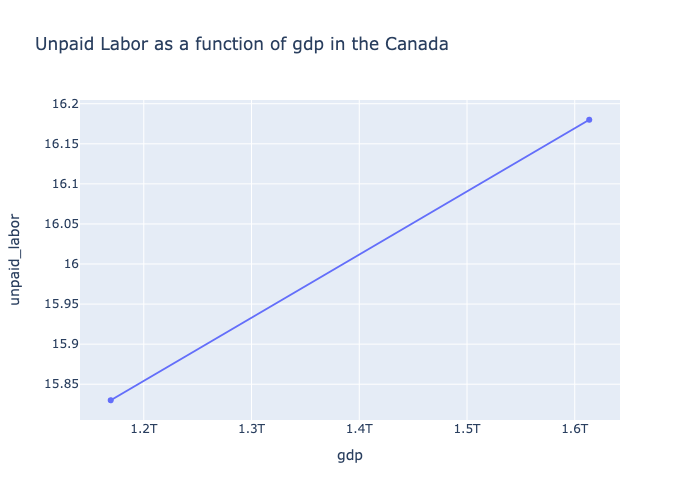

In [14]:
fig = px.scatter(pd_join_1[pd_join_1['Country Code']=='CAN'], x="gdp", y="unpaid_labor",
                 title='Unpaid Labor as a function of gdp in the Canada',
                trendline='ols')
fig.show("png")

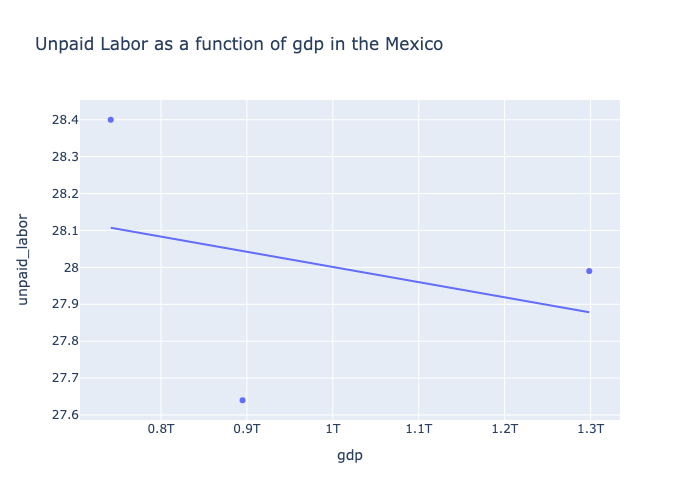

In [15]:
fig = px.scatter(pd_join_1[pd_join_1['Country Code']=='MEX'], x="gdp", y="unpaid_labor",
                 title='Unpaid Labor as a function of gdp in the Mexico',
                trendline='ols')
fig.show("png")

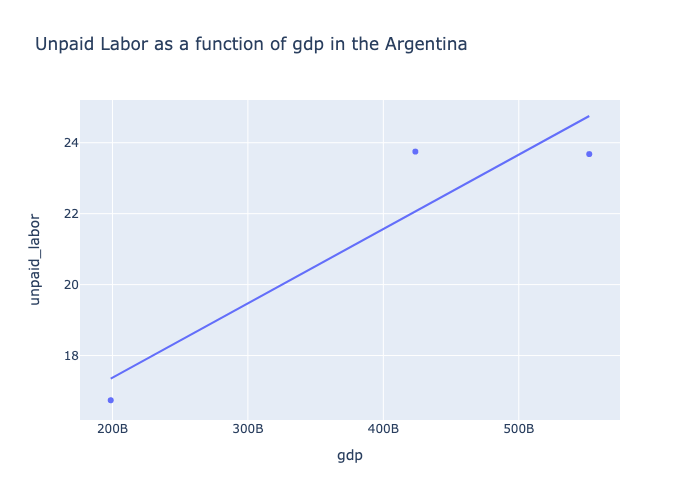

In [72]:
fig = px.scatter(pd_join_1[pd_join_1['Country Code']=='ARG'], x="gdp", y="unpaid_labor",
                 title='Unpaid Labor as a function of gdp in the Argentina',
                trendline='ols')
fig.show("png")

The US and Mexico show a decrease in unpaid labor with the increase in GDP, however this is not the case for Canada or Argentina. While it is true that data isn't readily available for a lot of countries to make a solid case in favor of GDP impacting unpaid labor; it leads me to believe that there are other factors contributing to the increase in unpaid labor. 

<h2> How Unpaid Labor Changes with time

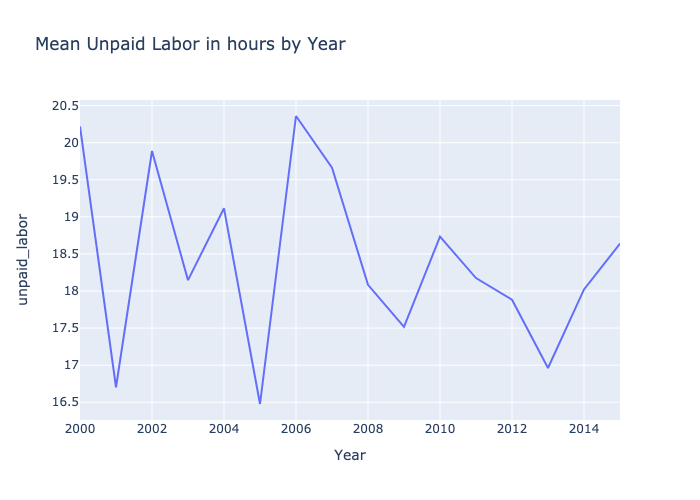

In [48]:
x1 = pd_join_1.groupby('Year')['unpaid_labor'].mean()
x1 = pd.DataFrame(x1).reset_index()
fig = px.line(x1,x='Year',y='unpaid_labor',title='Mean Unpaid Labor in hours by Year')
fig.show("png")

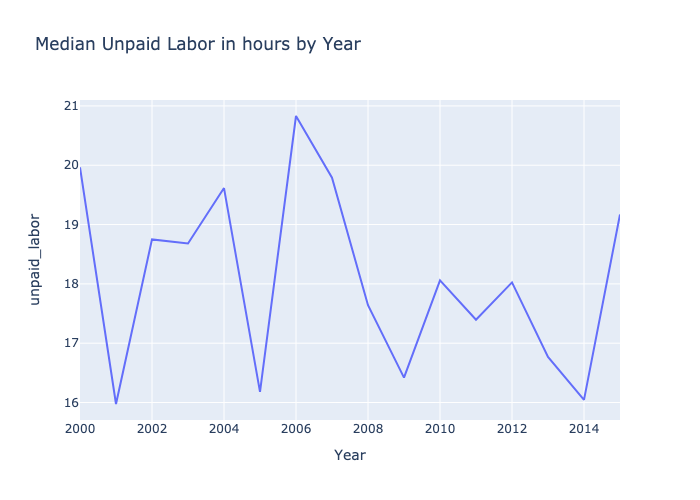

In [49]:
x1 = pd_join_1.groupby('Year')['unpaid_labor'].median()
x1 = pd.DataFrame(x1).reset_index()
fig = px.line(x1,x='Year',y='unpaid_labor',title='Median Unpaid Labor in hours by Year')
fig.show("png")

<h2> Unpaid Labor/GDP Across some Continents 

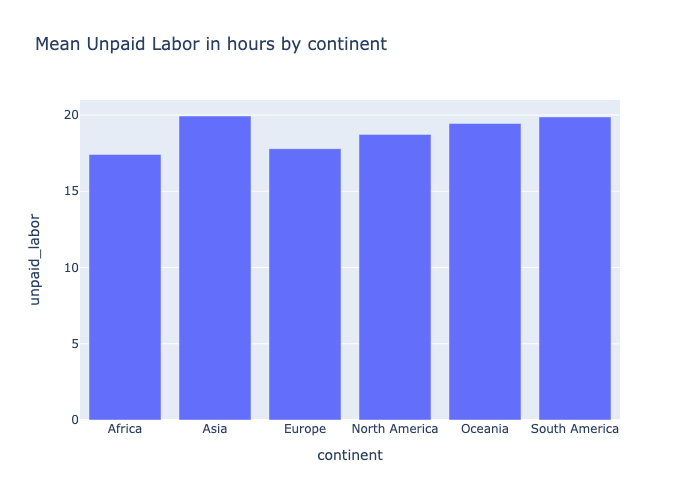

In [61]:
x1 = pd_join_1.groupby('continent')['unpaid_labor'].mean()
x1 = pd.DataFrame(x1).reset_index()
x1 = x1[x1['continent']!='Other']
fig = px.bar(x1,x='continent',y='unpaid_labor',title='Mean Unpaid Labor in hours by continent')
fig.show("png")

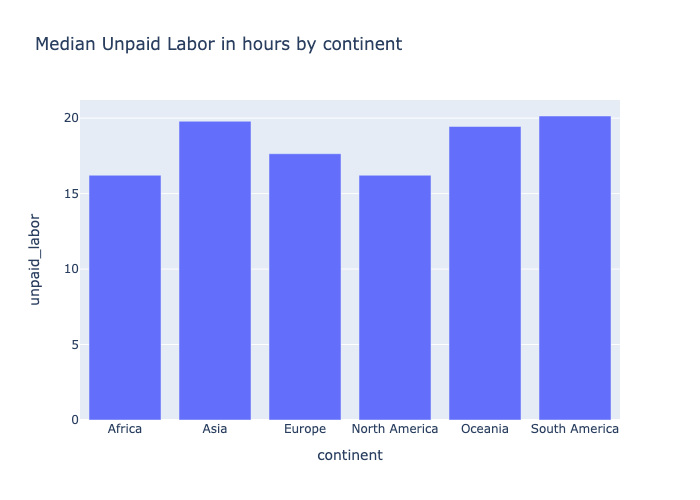

In [60]:
x1 = pd_join_1.groupby('continent')['unpaid_labor'].median()
x1 = pd.DataFrame(x1).reset_index()
x1 = x1[x1['continent']!='Other']
fig = px.bar(x1,x='continent',y='unpaid_labor',title='Median Unpaid Labor in hours by continent')
fig.show("png")

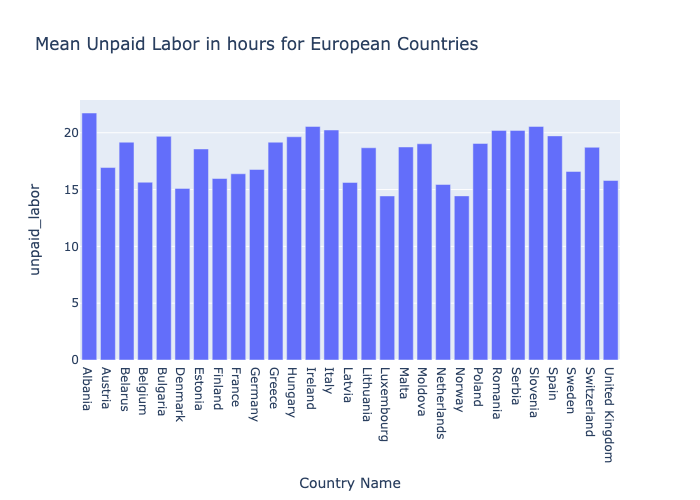

In [66]:
x1 = pd_join_1[pd_join_1['continent']=='Europe'].groupby('Country Name')['unpaid_labor'].mean()
x1 = pd.DataFrame(x1).reset_index()
fig = px.bar(x1,x='Country Name',y='unpaid_labor',title='Mean Unpaid Labor in hours for European Countries')
fig.show("png")

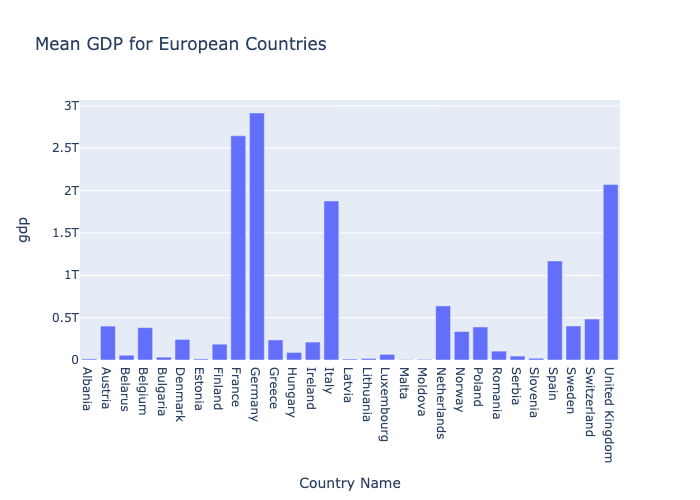

In [67]:
x1 = pd_join_1[pd_join_1['continent']=='Europe'].groupby('Country Name')['gdp'].mean()
x1 = pd.DataFrame(x1).reset_index()
fig = px.bar(x1,x='Country Name',y='gdp',title='Mean GDP for European Countries')
fig.show("png")

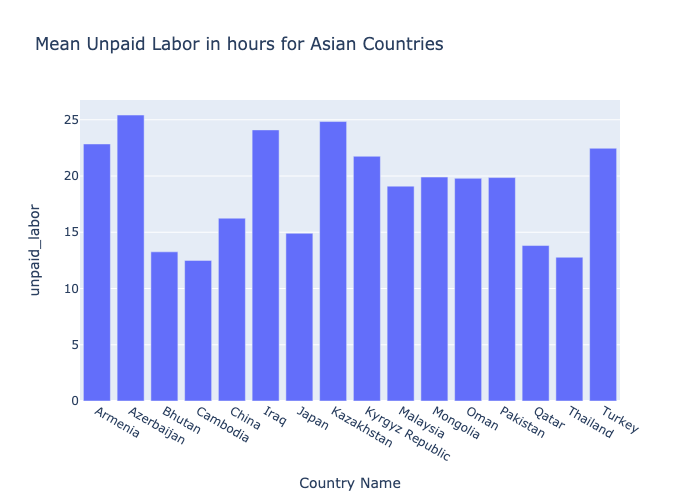

In [68]:
x1 = pd_join_1[pd_join_1['continent']=='Asia'].groupby('Country Name')['unpaid_labor'].mean()
x1 = pd.DataFrame(x1).reset_index()
fig = px.bar(x1,x='Country Name',y='unpaid_labor',title='Mean Unpaid Labor in hours for Asian Countries')
fig.show("png")

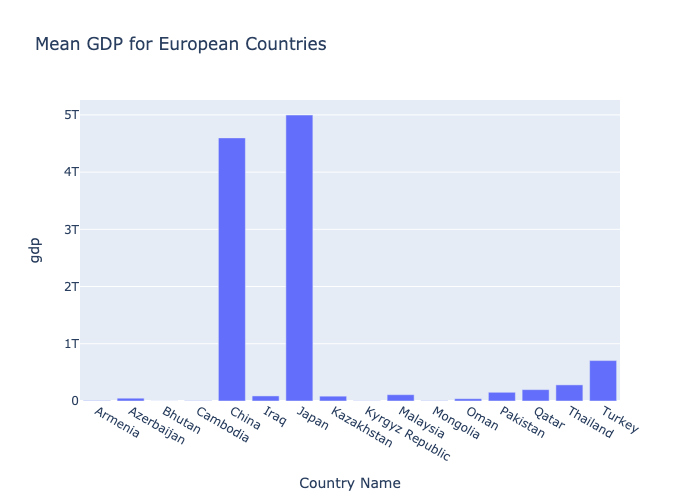

In [71]:
x1 = pd_join_1[pd_join_1['continent']=='Asia'].groupby('Country Name')['gdp'].mean()
x1 = pd.DataFrame(x1).reset_index()
fig = px.bar(x1,x='Country Name',y='gdp',title='Mean GDP for European Countries')
fig.show("png")

From a look at the charts above we can see that there are definitely cases where the amount of unpaid labor is lowered with increased GDP, however there are other cultural,economic, and political factors at play that can cause the unpaid labor to increase over time irrespective of GDP. Hence, GDP isn't a solid indicator of th